In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

2025-07-10 19:49:05.099871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-10 19:49:05.099931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-10 19:49:05.187856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-10 19:49:05.368297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-10 19:49:06.660692: W tensorflow/compiler/tf2

KeyboardInterrupt: 

In [ ]:
import tarfile
import pickle
import numpy as np
import os

# Step 1: Extract the archive (only once)
file_path = '/home/nikola/Documents/Assignment-9/cifar-10-python.tar.gz'
extract_path = './cifar10_data'

if not os.path.exists(extract_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)

# Step 2: Define loader
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        data = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        return data, np.array(labels)

# Step 3: Load training batches
x_train, y_train = [], []
for i in range(1, 6):
    data_batch, labels_batch = load_cifar_batch(f'{extract_path}/cifar-10-batches-py/data_batch_{i}')
    x_train.append(data_batch)
    y_train.append(labels_batch)

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Step 4: Load test batch
x_test, y_test = load_cifar_batch(f'{extract_path}/cifar-10-batches-py/test_batch')


In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Step 2: Build a simple CNN
model_no_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

2025-07-09 11:43:11.948511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-09 11:43:11.992709: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# Step 3: Compile and train
model_no_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_no_aug = model_no_aug.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20


2025-07-09 11:43:12.413247: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


704/704 - 35s - loss: 1.6134 - accuracy: 0.4044 - val_loss: 1.2326 - val_accuracy: 0.5656 - 35s/epoch - 49ms/step
Epoch 2/20
704/704 - 34s - loss: 1.2443 - accuracy: 0.5572 - val_loss: 1.0828 - val_accuracy: 0.6224 - 34s/epoch - 48ms/step
Epoch 3/20
704/704 - 33s - loss: 1.0836 - accuracy: 0.6189 - val_loss: 0.9714 - val_accuracy: 0.6584 - 33s/epoch - 47ms/step
Epoch 4/20
704/704 - 32s - loss: 0.9823 - accuracy: 0.6585 - val_loss: 0.8758 - val_accuracy: 0.6938 - 32s/epoch - 46ms/step
Epoch 5/20
704/704 - 32s - loss: 0.8995 - accuracy: 0.6837 - val_loss: 0.8040 - val_accuracy: 0.7204 - 32s/epoch - 46ms/step
Epoch 6/20
704/704 - 33s - loss: 0.8423 - accuracy: 0.7031 - val_loss: 0.7612 - val_accuracy: 0.7402 - 33s/epoch - 47ms/step
Epoch 7/20
704/704 - 33s - loss: 0.7895 - accuracy: 0.7224 - val_loss: 0.7496 - val_accuracy: 0.7410 - 33s/epoch - 47ms/step
Epoch 8/20
704/704 - 32s - loss: 0.7575 - accuracy: 0.7355 - val_loss: 0.6859 - val_accuracy: 0.7716 - 32s/epoch - 45ms/step
Epoch 9/20


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Define augmentations
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Step 2: Fit the generator (required for some transforms)
datagen.fit(x_train)

# Step 3: Build the same CNN architecture
model_aug = tf.keras.models.clone_model(model_no_aug)
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model using generator
history_aug = model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train) // 64,
    validation_data=(x_test, y_test),
    epochs=20,
    verbose=2
)

Epoch 1/20
781/781 - 40s - loss: 1.7050 - accuracy: 0.3689 - val_loss: 1.3624 - val_accuracy: 0.5088 - 40s/epoch - 52ms/step
Epoch 2/20
781/781 - 40s - loss: 1.3929 - accuracy: 0.4962 - val_loss: 1.1506 - val_accuracy: 0.5861 - 40s/epoch - 52ms/step
Epoch 3/20
781/781 - 40s - loss: 1.2622 - accuracy: 0.5503 - val_loss: 1.0718 - val_accuracy: 0.6242 - 40s/epoch - 52ms/step
Epoch 4/20
781/781 - 42s - loss: 1.1775 - accuracy: 0.5815 - val_loss: 1.0581 - val_accuracy: 0.6230 - 42s/epoch - 53ms/step
Epoch 5/20
781/781 - 41s - loss: 1.1179 - accuracy: 0.6051 - val_loss: 0.9256 - val_accuracy: 0.6706 - 41s/epoch - 52ms/step
Epoch 6/20
781/781 - 40s - loss: 1.0663 - accuracy: 0.6259 - val_loss: 0.8805 - val_accuracy: 0.6875 - 40s/epoch - 51ms/step
Epoch 7/20
781/781 - 40s - loss: 1.0319 - accuracy: 0.6326 - val_loss: 0.9193 - val_accuracy: 0.6735 - 40s/epoch - 51ms/step
Epoch 8/20
781/781 - 41s - loss: 1.0056 - accuracy: 0.6458 - val_loss: 0.8402 - val_accuracy: 0.6977 - 41s/epoch - 52ms/step


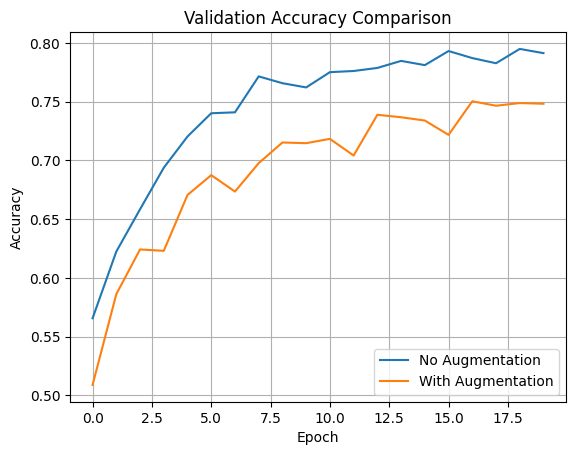

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation')
plt.plot(history_aug.history['val_accuracy'], label='With Augmentation')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

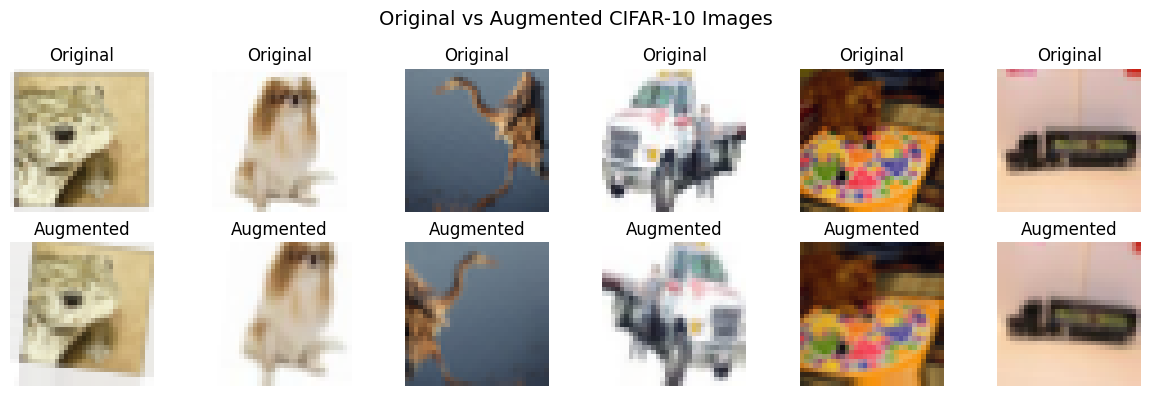

In [ ]:
# Select 6 random images from x_train
import numpy as np
import matplotlib.pyplot as plt

# Select 6 random indices
indices = np.random.choice(len(x_train), 6, replace=False)
original_images = x_train[indices]
original_labels = y_train[indices]

# Generate one augmented batch
augmented_images, _ = next(datagen.flow(original_images, original_labels, batch_size=6, shuffle=False))

# Plot Original and Augmented Side-by-Side
plt.figure(figsize=(12, 4))

for i in range(6):
    # Original
    plt.subplot(2, 6, i + 1)
    plt.imshow(original_images[i])
    plt.title("Original")
    plt.axis("off")

    # Augmented
    plt.subplot(2, 6, i + 7)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis("off")

plt.suptitle("Original vs Augmented CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(x_test, y_test, verbose=0)
test_loss_aug, test_acc_aug = model_aug.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy (No Augmentation):  {test_acc_no_aug * 100:.2f}%")
print(f"Test Accuracy (With Augmentation): {test_acc_aug * 100:.2f}%")

Test Accuracy (No Augmentation):  77.94%
Test Accuracy (With Augmentation): 74.83%


313/313 [==============================] - 2s 5ms/step


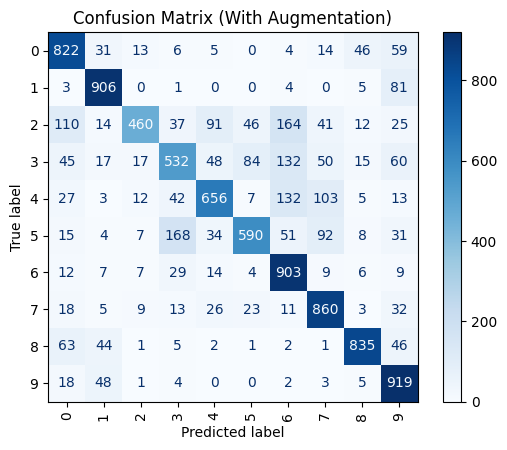

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
y_pred_aug = np.argmax(model_aug.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_aug)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix (With Augmentation)")
plt.show()
